In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [7]:
from torch.utils.data import DataLoader

In [2]:
# device config:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST 
train_dataset = torchvision.datasets.MNIST(root='../../data/mnist/',train=True,transform=transforms.ToTensor(),download=True)

In [6]:
test_dataset = torchvision.datasets.MNIST(root='../../data/mnist/',train=False, transform=transforms.ToTensor())

In [8]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
examples = iter(train_loader)
samples,labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [21]:
labels[0]

tensor(2)

Use matplotlib to show 6 images from the dataset and their labels:

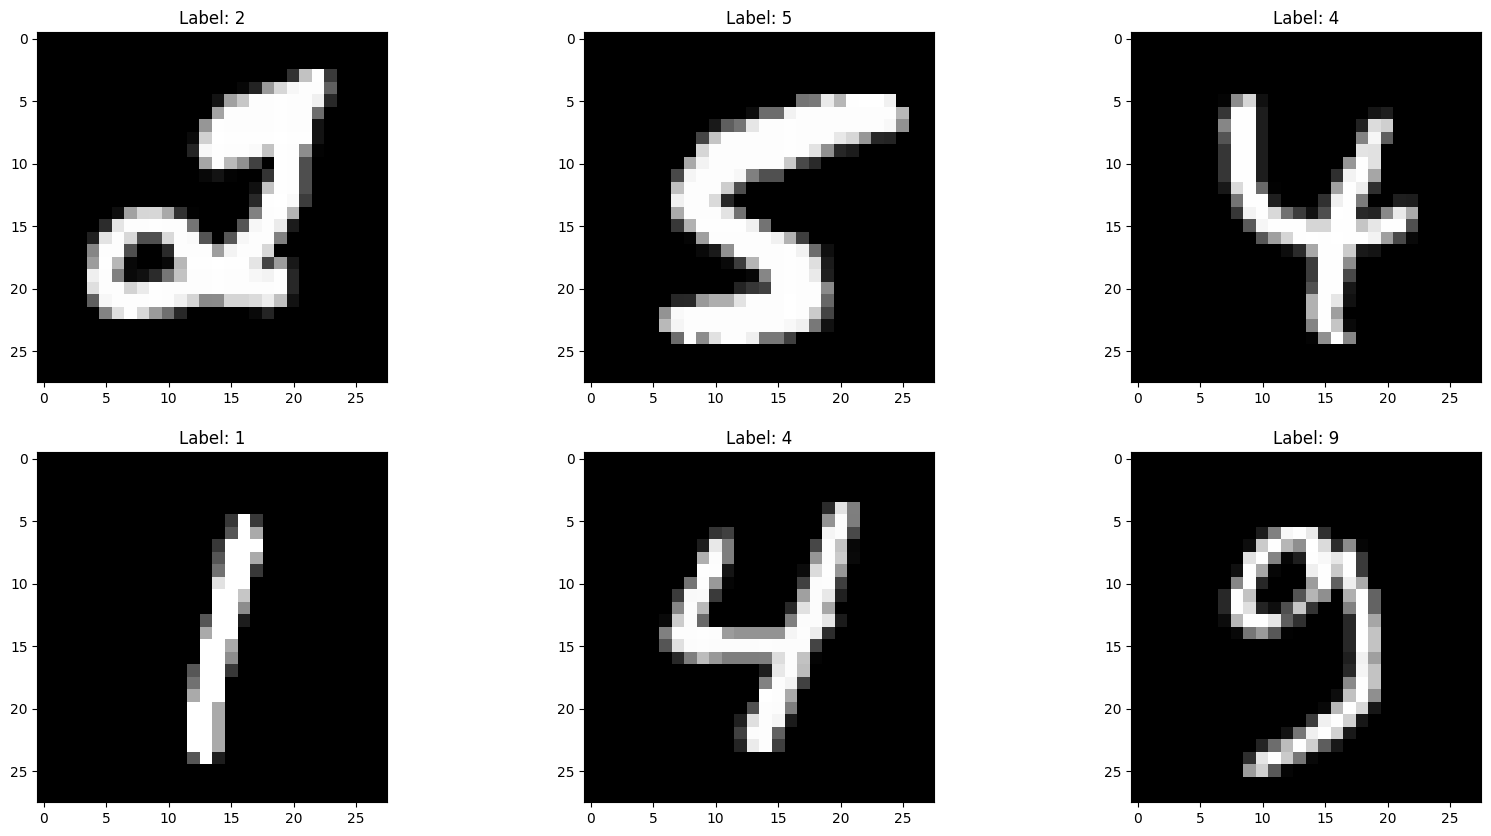

In [ ]:
counter= 0
fig, ax = plt.subplots(2,3, figsize=(20,10))
for i in range(2):
    for j in range(3):
        image = samples[counter]
        image = torch.permute(image,(1,2,0))
        image = torch.squeeze(image)
        ax[i,j].imshow(image.clone().numpy(),cmap="gray")
        ax[i,j].set_title(f"Label: {labels[counter].item()}")
        counter+=1

Classify these digits:

In [51]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        nn.init.kaiming_normal_(self.l1.weight)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        nn.init.xavier_normal_(self.l2.weight)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [55]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [56]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [57]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.view(-1,784).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs,labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            if (i+1)%100 == 0:
                train_acc = (torch.argmax(outputs,dim=1) == labels).sum().item()/labels.shape[0]
                t_loss_sum = 0
                t_acc_sum = 0
                for i, (t_images,t_labels) in enumerate(test_loader):
                    t_images = t_images.view(-1, 784).to(device)
                    t_labels = t_labels.to(device)
                    t_outputs = model(t_images)
                    t_loss = criterion(t_outputs,t_labels)
                    t_loss_sum += t_loss.item()*t_images.shape[0]
                    t_acc_sum += (torch.argmax(t_outputs, dim=1) == t_labels).sum().item()
                t_loss_sum = t_loss_sum/len(test_dataset)
                t_acc_sum = t_acc_sum/len(test_dataset)
                print(f"Epoch: {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, train_loss = {loss.item():.4f}, test_loss: {t_loss_sum:.4f}, train_acc: {train_acc:.4f}, test_acc: {t_acc_sum:.4f}")



Epoch: 1/2, step 100/600, train_loss = 0.4793, test_loss: 0.3659, train_acc: 0.9000, test_acc: 0.9002
Epoch: 1/2, step 100/600, train_loss = 0.2237, test_loss: 0.2903, train_acc: 0.9300, test_acc: 0.9174
Epoch: 1/2, step 100/600, train_loss = 0.2727, test_loss: 0.2606, train_acc: 0.9100, test_acc: 0.9257
Epoch: 1/2, step 100/600, train_loss = 0.2211, test_loss: 0.2222, train_acc: 0.9400, test_acc: 0.9368
Epoch: 1/2, step 100/600, train_loss = 0.1738, test_loss: 0.2043, train_acc: 0.9600, test_acc: 0.9429
Epoch: 1/2, step 100/600, train_loss = 0.2698, test_loss: 0.1931, train_acc: 0.9400, test_acc: 0.9448
Epoch: 2/2, step 100/600, train_loss = 0.1860, test_loss: 0.1792, train_acc: 0.9400, test_acc: 0.9485
Epoch: 2/2, step 100/600, train_loss = 0.1295, test_loss: 0.1723, train_acc: 0.9700, test_acc: 0.9507
Epoch: 2/2, step 100/600, train_loss = 0.0780, test_loss: 0.1600, train_acc: 0.9800, test_acc: 0.9553
Epoch: 2/2, step 100/600, train_loss = 0.1095, test_loss: 0.1515, train_acc: 0.960